# Aufgaben

In [ ]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler


## Quiz-Section

## WarmUp
<div>
    <img src=attachment:1d58fba3-dd18-4609-a776-6e3d77859818.png width=100>
</div>
Let's do stretching: Kleinstaufgaben, um die gelernten Funktionen einzuüben.

## Python "Schmankerl": Elbow-Plot-One-Liner

<div>
    <img src=attachment:a5353578-2c6f-42b3-980a-8a81c520f1f0.png width=200>
</div>

Nutzen Sie die Daten `X`, um in _einer Zeile_ einen Elbow-Plot (s. Abbildung oben) für `KMeans` mit $k=2,\dots, 10$ zu erzeugen.

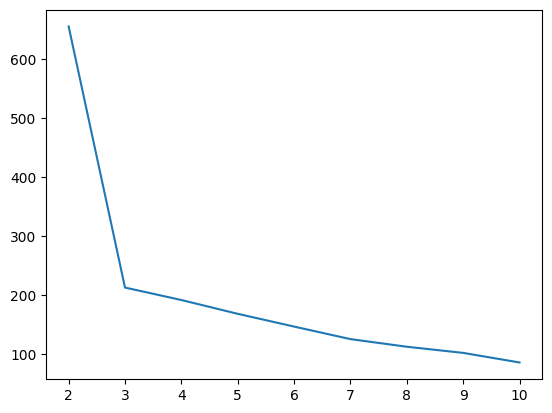

In [6]:
# Your Data
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)

# One-liner
plt.plot(range(2,11), [KMeans(cluster_size).fit(X).inertia_ for cluster_size in np.arange(2,11)])


## Aufgabe: Microtargeting mit $k$-means

<div>
    <img src=attachment:5473a5f0-ea55-47e1-be86-b8f71bde5a2c.png width=100>
</div>

Stellen Sie sich vor Sie wären ein skrupelloser Spitzenkanditat einer Partei und es stehen Wahlen an. Wenn Sie Ihre Bestrebungen rein unter dem Aspekt der Maximierung der Anzahl an Bürgern, die Sie wählen, sehen, dann würden Sie - im Idealfall - versuchen jeder Bürger:in das zu versprechen, was sie hören will. Das andere Extremum wäre eine pauschale Aussage (Wahlprogramm) zu haben und dies an alle Bürger zu richten. Da Ersteres zu viel Aufwand bedeuten würde und Letzteres Ihnen zu wenig Wähler auf individueller Basis erreicht, entschließen Sie sich für einen Mittelweg dazwischen - das _Microtargeting_. (Evtl. haben Sie diesen Begriff schon im Kontext mit einem US-Wahlkampf und dem Unternehmen _Cambridge Analytica_ gehört)

Ihnen liegen die Daten `citizen_database.csv` vor. Darin finden Sie Informationen Ihrer Bürger über die Anzahl an Fahrrädern pro Familie, wie weit jemand vom Zentrum einer Großstadt weg wohnt, den Verdienst der jeweiligen Person und das Bildungslevel. Sie denken, dass dies wichtige Maße sind, um individualisierte Botschaften an Personengruppen zu senden, die sich in dem aufspannenden Feature-Raum bilden.

Führen Sie hierzu ein $k$-means Clustering durch, untersuchen Sie wie viele Gruppen Sie in diesem Raum finden und überlegen Sie sich welche Botschaften Sie an die einzelnen Gruppen senden würden, damit Ihr Zuspruch als Spitzenkandidat steigt. Visualisieren Sie sich den Datensatz mit der `seaborn`-Funktion `pairplot`. (Bemerkung: evtl. sind Sie ja mit dem ersten Versuch Ihres Scree-/Elbow-Plots unzufrieden - schauen Sie sich mal die Klasse `sklearn.preprocessing.StandardScaler` an. Warum hilft uns die hier?)

In [14]:
df = pd.read_csv("./../res/data/citizen_database.csv")
df.head()

,number_of_bikes_per_family,miles_from_city_center,income,education_level
0,7.0,3.063661,6741.250733,319.618160
1,1.0,35.097521,5351.704679,109.937496
2,1.0,36.378821,5194.543802,108.099519
3,4.0,46.166686,2052.873117,5.498301
4,5.0,3.473860,6960.321864,291.361078


In [ ]:
from sklean.preprocessing import StandardScaler


In [ ]:
kmeans = KMeans(4)
kmeans.fit(df_transformed)


NameError: name 'df_transformed' is not defined

## Aufgabe: Anomaliedetektion bei Drehmomentmessungen eines Roboterarms
<div>
    <img src=attachment:893037fa-ba65-4ac8-afaa-30208a8bac80.png width=100>
</div>

Ein Problem bei der Anomalierkennung ist häufig das Fehlen von Labels. Entweder fehlen diese gänzlich oder es liegen nur die Labels des "Gesundzeitraums" vor. Bei Ersterem behilft man sich im Maschinenbaukontext häufig damit z.B. nach Inbetriebnahme oder Wartung einer Maschine einen bestimmten Zeitraum als "Gutzeitraum" zu klassifizieren. Dann liegen zumindest Labels für eine Klasse - der _Normaldaten_ - vor. Eine weitere Möglichkeit für Datensätze im Anomaliedetektionskontext ist, dass man aufgrund der Erfahrung bzw. Aufzeichnungen des Verhaltens einer Maschine weiß wie viel Prozent des Datensatzes Anomalien darstellen müssten. Mit dieser Situation beschäftigen wir uns in diesem Beispiel.


Stellen Sie sich vor Sie würden bei einem Maschinenabuunternehmen mit langen, hochautomatisierten Fertigungsstraßen arbeiten. Sie bekommen 300 Kraft- bzw. Beschleunigungsmessungen `(F_x, F_y, F_z)`  eines der Roboterarme in der Linie (`anomaly_detection.npy`). Aus den Erfahrungen und Notizen der Operators der Linie wissen Sie, dass es sich um einen problematischen Roboterarm handelt, der vom Unternehmen gerne überwacht werden würde - denn: zu ca. 15% der Zeit weist er _anomales_ Verhalten auf. Das Unternehmen stellt Ihnen die Aufgabe einen _Anomaliedetektor_ zu bauen, der zuverlässig anzeigen kann, ob sich der Roboterarm gerade in einem _anomalen_ oder normalen Zustand befindet. Beachten Sie, dass sich normales Verhalten des Roboters in einer beliebigen Anzahl an Clustern im Feature-Raum widerspiegeln kann - Ihr Ziel ist also nicht nach zwei Clustern "anomal" und "normal" zu suchen. Es geht um einen anderen Aspekt, der den DBSCAN auszeichnet.

Nutzen Sie hierzu DBSCAN als Modell, um den Feature-Raum in _anomale_ und normale Bereiche zu unterteilen. Visualisieren Sie sich vorab die Daten auf geeignete Weise (Hinweis: `seaborn.pairplot`). Begeben Sie sich anschließend auf die Suche nach geeigneten Hyperparametern. Woran können Sie festmachen, ob Sie einen geeigneten Satz an Hyperparametern gefunden haben? Hinweis: hierzu könnte Ihnen `seaborn.heatmap` behilflich sein. Wenn Sie geeignete Hyperparametereinstellungen gefunden haben, dann visualisieren Sie sich den Datensatz erneut mittels `seaborn.pairplot` - nun jedoch als Einfärbung der Punkte: die `dbscan.labels_`. Können Sie diese Art der Visualisierung nutzen, um eine endgültige Entscheidung bzgl. der Hyperparameter zu treffen? Trainieren Sie schließlich einen Klassifikator als eigentlichen Anomaliedetektor und probieren Sie ein paar "unbekannte" Daten aus.

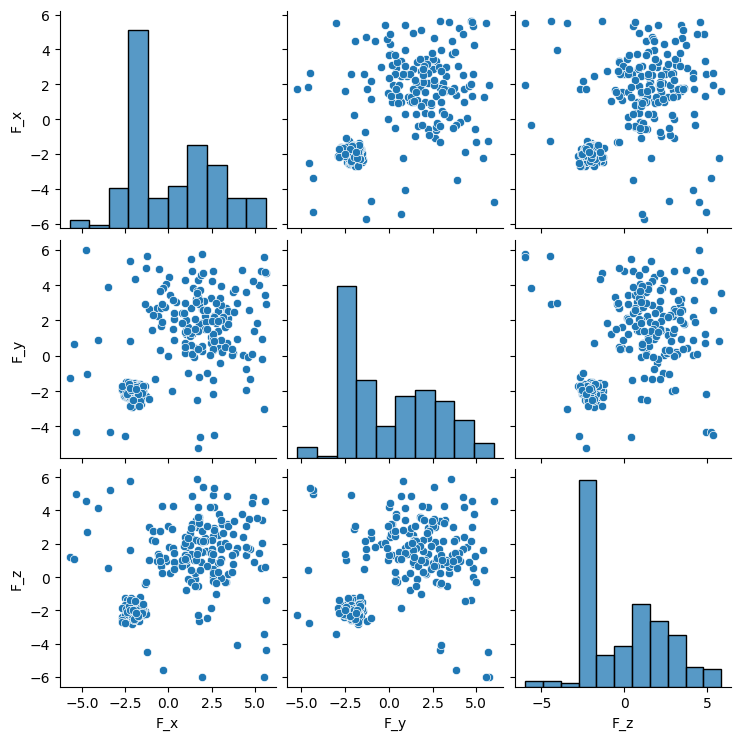

In [ ]:
X = np.load("./../res/data/anomaly_detection.npy")
import seaborn as sns
sns.pairplot(pd.DataFrame(X, columns=['F_x','F_y','F_z']))


In [56]:
eps_range = np.arange(1,2,0.05)
min_samples_range = np.arange(2,5,1)
array_of_otlier_ratios = np.zeros((len(eps_range), len(min_samples_range)))
for eps_ind, eps in enumerate(eps_range):
    for min_samples_ind, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        outlier_ratio = (dbscan.labels_ == -1 ).sum() / X.shape[0] * 100
        array_of_otlier_ratios[eps_ind, min_samples_ind] = outlier_ratio


([<matplotlib.axis.YTick at 0x707026be4050>,
 [Text(0, 0.5, '1.0'),
  Text(0, 1.5, '1.05'),
  Text(0, 2.5, '1.1'),
  Text(0, 3.5, '1.1500000000000001'),
  Text(0, 4.5, '1.2000000000000002'),
  Text(0, 5.5, '1.2500000000000002'),
  Text(0, 6.5, '1.3000000000000003'),
  Text(0, 7.5, '1.3500000000000003'),
  Text(0, 8.5, '1.4000000000000004'),
  Text(0, 9.5, '1.4500000000000004'),
  Text(0, 10.5, '1.5000000000000004'),
  Text(0, 11.5, '1.5500000000000005'),
  Text(0, 12.5, '1.6000000000000005'),
  Text(0, 13.5, '1.6500000000000006'),
  Text(0, 14.5, '1.7000000000000006'),
  Text(0, 15.5, '1.7500000000000007'),
  Text(0, 16.5, '1.8000000000000007'),
  Text(0, 17.5, '1.8500000000000008'),
  Text(0, 18.5, '1.9000000000000008'),
  Text(0, 19.5, '1.9500000000000008')])

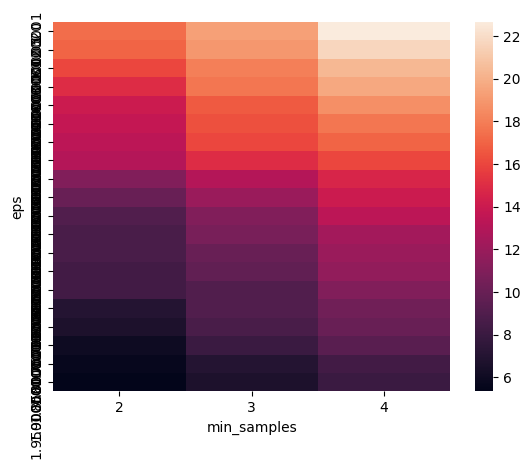

In [57]:
sns.heatmap(array_of_otlier_ratios)
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.xticks(ticks = np.arange(0.5, len(min_samples_range)+0.5), labels=min_samples_range)
plt.yticks(ticks = np.arange(0.5, len(eps_range)+0.5), labels=eps_range)

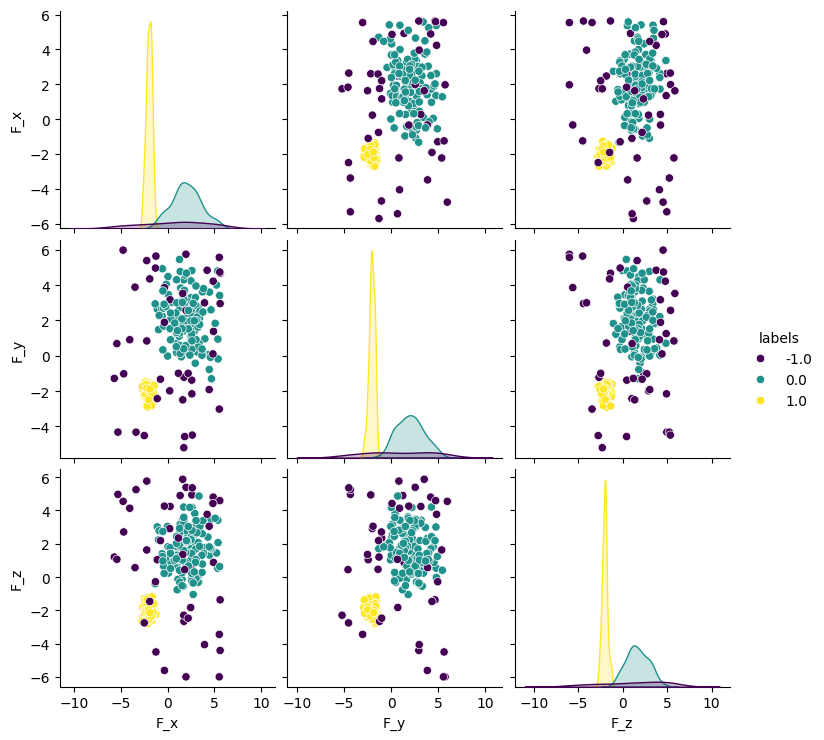

In [66]:
dbscan = DBSCAN(eps=1.35, min_samples=3)
dbscan.fit(X)

# SHow
X_y = np.concatenate((X, dbscan.labels_.reshape(-1,1)), axis=1)
sns.pairplot(pd.DataFrame(X_y, columns=['F_x','F_y','F_z', 'labels']), hue='labels', palette='viridis')

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X, dbscan.labels_)





,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [70]:
svm.predict([[-5,3,2]])

array([-1])

## Bonus-Aufgabe: den Wald vor lauter Validierungskriterien...

<div>
    <img src=attachment:ee58286f-0088-4a08-935e-da9a8891cd12.png width=500>
</div>

Wir haben verschiedene Validierungskriterien zur Untersuchung von Clustering-Ergebnissen kennengelernt - darunter den Silhouette Score, den Davies-Bouldin Index und Sum-of-Squared-Distances. Sie sind skeptisch: kann man mittels dieser Maße wirklich zuverlässig die zugrundeliegende Anzahl an Clustern in einem Datensatz bestimmen? Daher wollen Sie in dieser Aufgabe den Validierungskriterien auf den Zahn fühlen und sich eine Funktion schreiben, die Ihnen eine Grafik wie oben erzeugt. In jedem Subplot sollen sich die drei Validierungskriterien als Linienplots abbilden. Die Funktion soll als Eingabeargumente `list_of_std` und `list_of_num_blobs` aufnehmen. Ersteres repräsentiert eine Liste an Standardabweichungen, Letzteres eine Liste der Anzahl an Blobs, die Sie jeweils für die Funktion `make_blobs` verwenden sollen. `make_blobs` soll innerhalb der Funktion für jede mögliche Kombination aus "Standardabweichung" aus `list_of_std` und "Anzahl an Blobs" aus `list_of_num_blobs` aufgerufen werden, um uns den Datensatz für unser Clustering zu erzeugen. Um die Linienplots der Validierungskriterien __pro Kombination__ "Standardabweichung" und "Anzahl an Blobs" zu erzeugen, führen Sie Clusterings mittels der `KMeans`-Klasse aus für $k=2,\dots,11$. Achten Sie darauf, dass sich die Validierungskriterien auf unterschiedlichen Skalen abspielen. Nutzen Sie den `MinMaxScaler`, um diesem Aspekt zu begegnen. Fügen Sie noch eine vertikale Linie in jeden Subplot, der Ihnen die zugrundeliegende Anzahl an Blobs anzeigt. Ein möglicher Funktionsaufruf könnte sein `explore_validation_criteria([0.2, 0.3, 0.5, 1], [3, 4, 5, 6, 7])`.

In [93]:
def explore_validation_criteria(list_of_std, list_of_num_blobs):
    """

    """
    num_std = len(list_of_std)
    num_blobs = len(list_of_num_blobs)
    fig, ax = plt.subplots(num_std, num_blobs, figsize=(20, 15))
    run_ind = 0
    
    # Loop over stds
        
        # Loop over num_blobs
            
            # Loop over k
                
                # Train kmeans

                # Build list of inertias

                # Build list of Davies Bouldins

                # Build list of Silhouette Scores

            # Plot scores as line plots


# Quellen

<div>
    <img src=attachment:66592bab-9bef-450a-a143-36c163b03c04.png width=100>
</div>

Icon made by https://www.freepik.com from https://www.flaticon.com/

<div>
    <img src=attachment:42fde196-5a85-4f3e-b760-24195067f84e.png width=100>
</div>
<div>Icons made by <a href="https://www.flaticon.com/authors/flat-icons" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>

<div>
    <img src=attachment:7ac75623-172d-4d2d-8e47-382d3f0fc775.png width=100>
</div>
<div>Icons made by <a href="https://www.flaticon.com/authors/flat-icons" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>